# Topic Modelling - LDA (Gensim)

In [1]:
# Run this cell to install required dependencies
!pip install pytextrank
!pip install pyLDAvis
!pip install gensim
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!python -m spacy download en_core_web_md 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!


     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     -- ------------------------------------- 2.3/42.8 MB 48.1 MB/s eta 0:00:01
     --- ------------------------------------ 3.9/42.8 MB 41.5 MB/s eta 0:00:01
     ----- ---------------------------------- 5.6/42.8 MB 39.4 MB/s eta 0:00:01
     ------ --------------------------------- 6.7/42.8 MB 35.7 MB/s eta 0:00:02
     -------- ------------------------------- 8.8/42.8 MB 37.4 MB/s eta 0:00:01
     --------- ----------------------------- 10.4/42.8 MB 38.5 MB/s eta 0:00:01
     ---------- ---------------------------- 11.6/42.8 MB 34.4 MB/s eta 0:00:01
     ----------- --------------------------- 13.1/42.8 MB 34.6 MB/s eta 0:00:01
     ------------- ------------------------- 14.5/42.8 MB 31.2 MB/s eta 0:00:01
     --------------- ----------------------- 16.9/42.8 MB 36.4 MB/s eta 0:00:01
     ---------------- ---------------------- 18.5/42.8 MB 34.4 MB/s eta 0:00:01
     ------------------ -------------------- 20.

In [2]:
# Import required libraries
import pandas as pd
import json
import re
import pandas as pd
import numpy as np
import nltk
import spacy
import re
import time
from bs4 import BeautifulSoup

import gensim
# supporting function
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline

import nltk                      
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nlp = spacy.load('en_core_web_md')
stops = stopwords.words('english')
newStopWords = ['report', 'reports', 'even', 'still', 'like', 'say', 'says', 'said', 'global', 'time', 'government', 'warmer', 'warming', 'warm' 'people', 'countries', 'years', 'country', 'year', 'event', 'scientist', 'heat', 'study', 'climate', 'change', 'emission', 'emissions','said', 'world', 'yearly', 'say', 'would','could','also']
stops.extend(newStopWords)

# Load Pre-trained Model (if it has already been trained)

In [3]:
lda_model=gensim.models.ldamodel.LdaModel.load("climate_lda.gensim")

# Preprocessing

In [4]:
# Helper functions to preprocess and lemmatize

def basic_preprocess(self_text):
    
     # 1. Remove html tags
    words = BeautifulSoup(self_text).get_text()
    # 2. Convert words to lower case and split each word up
    words = self_text.lower()
    # 3. Remove non-letters aka punctuation
    words = re.sub("[^a-zA-Z]", " ", words).split()    
    
    # 4 Remove stopwords and words with less than 3 characters
    words = [word for word in words if word not in stops and len(word) > 3]
    
    # 5 LEMMATIZE
    words = [lemmatizer.lemmatize(w) for w in words]
    # 6. Return words
    return words




# Bigram/Trigram Phrase Model Functions

In [5]:
def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Read data into Dataframe

In [6]:
articles = pd.read_csv("news_articles.csv", encoding="utf8")

In [7]:
news_articles_df = pd.DataFrame(articles)

In [8]:
news_articles_df


,id,body,headline,article_name,article_url,date_published,article_length,date_uploaded,article_start_url,source
0,NaN,", San Francisco This video can not be played G...",Climate change: Greenland ice melt 'is acceler...,science-environment-48387030,https://www.bbc.com/news/science-environment-4...,10/12/2019 16:03,5963,2022-04-18T03:39:35.914119,NaN,bbc
1,NaN,North Atlantic hurricanes are retaining far mo...,Climate change: Hurricanes get stronger on lan...,science-environment-54902068,https://www.bbc.com/news/science-environment-5...,11/11/2020 16:04,4225,2022-04-18T03:39:40.407571,NaN,bbc
2,NaN,US President Donald Trump has accused climate ...,Trump: Climate change scientists have 'politic...,world-us-canada-45859325,https://www.bbc.com/news/world-us-canada-45859325,15/10/2018 9:48,5291,2022-04-18T03:39:45.015760,NaN,bbc
3,NaN,video can not be played Sir Ed Davey has won t...,Sir Ed Davey wins Liberal Democrat leadership ...,uk-politics-53933470,https://www.bbc.com/news/uk-politics-53933470,27/8/2020 12:55,5148,2022-04-18T03:39:47.745532,NaN,bbc
4,NaN,Greenland is not used to being the centre of a...,"As the ice melts, Greenland considers its future",business-51014148,https://www.bbc.com/news/business-51014148,9/1/2020 0:01,7127,2022-04-18T03:39:49.727764,NaN,bbc
...,...,...,...,...,...,...,...,...,...,...
5869,NaN,Western Australian government will be the thir...,WA to create climate change legislation,5015927a1f508b6dca56824e5706e0d7,https://www.skynews.com.au/australia-news/poli...,25/1/2023 2:23,428,2023-01-26T04:26:22.246885,https://www.skynews.com.au/australia-news/poli...,skyau
5870,NaN,US President Joe Biden says the Inflation Redu...,Climate change is ‘an existential threat’: Biden,87451e73b77c8d783562d895981cf9e3,https://www.skynews.com.au/world-news/united-s...,8/2/2023 5:24,579,2023-02-09T07:24:45.700825,https://www.skynews.com.au/world-news/united-s...,skyau
5871,NaN,Prime Minister Anthony Albanese says the “entr...,The entry fee for credibility is action on cli...,ae86ed7bffbc3477344427ff3564b736,https://www.skynews.com.au/australia-news/poli...,15/12/2022 6:33,642,2023-02-09T07:28:51.978641,https://www.skynews.com.au/australia-news/poli...,skyau
5872,NaN,Newly-appointed Prime Minister of New Zealand ...,NZ PM blames climate change amid Auckland floods,b565e2eb79992f6a4554a59c0712917f,https://www.skynews.com.au/world-news/global-a...,30/1/2023 3:53,2996,2023-02-09T07:29:14.200831,https://www.skynews.com.au/world-news/global-a...,skyau


# Perform pre-processing on data

In [9]:
news_articles_df["body"] = news_articles_df["body"].astype(str)
news_articles_df["processed_content"] = news_articles_df["body"].apply(basic_preprocess)

# Create Bigram/Trigram Models

Make bigrams/trigrams after preprocessing

In [10]:
bigram = gensim.models.Phrases(news_articles_df["processed_content"], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[news_articles_df["processed_content"]], threshold=100)  


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [11]:
# data_word_bigrams = make_bigrams(news_articles_df["processed_content"])
data_word_trigrams = make_trigrams(news_articles_df["processed_content"])

In [12]:
dictionary = gensim.corpora.Dictionary(data_word_trigrams)

bow_corpus = [dictionary.doc2bow(text) for text in data_word_trigrams]


# Determine optimal no. of topics
1) Train using a range of k from 1 to 10 
2) Plot Perplexity and Coherence graphs
3) Choose model which has either lowest perplexity/highest coherence

In [56]:
model_list = []
coherence_values = []
model_topics = []

def train_ldamodel():
    result = []
    for i in range(2, 11, 2):
        start = time.process_time()
        lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=2, workers=2)
        model_topics.append(i)
        model_list.append(lda_model)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_word_trigrams, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
        result.append([i, coherence_lda])
        print("#Topics: " + str(i) + " Score: " + str(coherence_model_lda.get_coherence()))
        print(time.process_time() - start)
    return result
        
        
scores = train_ldamodel()        
        


#Topics: 2 Score: 0.26414075969800954
61.4375
#Topics: 4 Score: 0.27019240810063805
62.328125
#Topics: 6 Score: 0.28048722527382464
60.25
#Topics: 8 Score: 0.3094308970349466
62.625
#Topics: 10 Score: 0.3113323788629906
63.609375


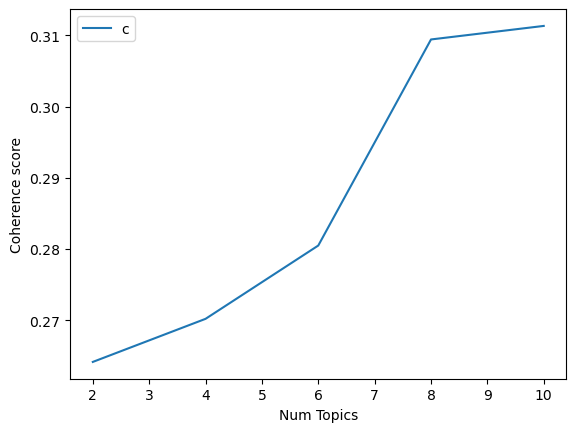

In [58]:
limit=11; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2641
Num Topics = 4  has Coherence Value of 0.2702
Num Topics = 6  has Coherence Value of 0.2805
Num Topics = 8  has Coherence Value of 0.3094
Num Topics = 10  has Coherence Value of 0.3113


# Show top 10 words from 4 topics

In [75]:
model_list = []
coherence_values = []
model_topics = []

start = time.process_time()
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)
model_topics.append(4)
model_list.append(lda_model)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_word_trigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(time.process_time() - start)

59.953125


In [18]:
lda_model

In [19]:
lda_model.show_topics(4, 15)

[(0,
  '0.005*"temperature" + 0.004*"level" + 0.004*"people" + 0.004*"water" + 0.003*"scientist" + 0.003*"ocean" + 0.003*"impact" + 0.003*"risk" + 0.003*"need" + 0.003*"record" + 0.002*"human" + 0.002*"much" + 0.002*"part" + 0.002*"many" + 0.002*"found"'),
 (1,
  '0.005*"people" + 0.005*"carbon" + 0.004*"biden" + 0.004*"energy" + 0.003*"temperature" + 0.003*"policy" + 0.003*"president" + 0.003*"last" + 0.003*"action" + 0.003*"state" + 0.003*"plan" + 0.003*"australia" + 0.002*"level" + 0.002*"many" + 0.002*"issue"'),
 (2,
  '0.004*"action" + 0.004*"policy" + 0.003*"energy" + 0.003*"temperature" + 0.003*"need" + 0.003*"people" + 0.003*"make" + 0.003*"nation" + 0.003*"level" + 0.003*"state" + 0.003*"company" + 0.003*"scientist" + 0.002*"many" + 0.002*"environmental" + 0.002*"last"'),
 (3,
  '0.008*"people" + 0.004*"carbon" + 0.004*"temperature" + 0.003*"much" + 0.003*"make" + 0.003*"many" + 0.003*"need" + 0.003*"scientist" + 0.003*"human" + 0.003*"last" + 0.003*"planet" + 0.003*"energy" +

# Visualization

In [15]:
'''
Now that the LDA model is built, the next step is to examine the produced 
topics and the associated keywords. There is no better tool than pyLDAvis package’s 
interactive chart and is designed to work well with jupyter notebooks.
'''
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualize the topics
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [16]:
vis1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.024327 -0.009232       1        1  30.265440
3      0.011573  0.012641       2        1  25.676150
1     -0.019532 -0.007113       3        1  25.338573
2     -0.016368  0.003705       4        1  18.719838, topic_info=           Term          Freq         Total Category  logprob  loglift
2530      biden   4323.000000   4323.000000  Default  30.0000  30.0000
885      policy   5027.000000   5027.000000  Default  29.0000  29.0000
181      people  10982.000000  10982.000000  Default  28.0000  28.0000
518   president   3416.000000   3416.000000  Default  27.0000  27.0000
972      carbon   6783.000000   6783.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
181      people   1222.146641  10982.214872   Topic4  -5.8278  -0.5201
287     already    839.816480   3993.733812   Topic4  -6.2030   0.1163
864        much    911.976270   5427.637181   Topic4  -6.1205  -0.1081
972      carbon    927.704822   6783.012737   Topic4  -6.1034  -0.3139
398        take    835.540079   3946.008979   Topic4  -6.2081   0.1232

[426 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
54145      2  0.792600            abseiled
42657      1  0.071813  accelerate_phasing
42657      2  0.071813  accelerate_phasing
42657      3  0.071813  accelerate_phasing
42657      4  0.718126  accelerate_phasing
...      ...       ...                 ...
283        3  0.462746                zero
283        4  0.187651                zero
50106      1  0.104975             zukunft
50106      3  0.839801             zukunft
50106      4  0.104975             zukunft

[1172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

# Find the most dominant topic

In [8]:
#Find most dominant topic
def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[5] where the number of topics is 6

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[0], corpus=bow_corpus, data=data_word_trigrams)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


NameError: name 'model_list' is not defined

# Save LDA Model and theta + beta distributions

In [20]:
#Save a model to disk, or reload a pre-trained model
news_lda_sav=lda_model #Or you can save the second best model, model_list[8]

news_lda_sav.save("climate_lda.gensim")

lda_disk=gensim.models.ldamodel.LdaModel.load("climate_lda.gensim")

In [21]:
# Saves the document topic probabilities ("theta)
vec=news_lda_sav[bow_corpus]
pd.DataFrame(vec).to_csv("doc_topic_mixture.csv")

In [ ]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
for t in range(news_lda_sav.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in news_lda_sav.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
